#### **HSS 611 - Week 15: Text classification**

**December 5, 2023**

#### **Install libraries**



In [97]:
### pandas and numpy

import pandas as pd
import numpy as np

### vectorizers

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### algorithms

from sklearn.linear_model import LogisticRegression

### train, test, validation

import random
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

#### **Read labeled data**

In [137]:
### location for news title data (from Week 14)

url = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_14/news_title.csv'
df = pd.read_csv(url, sep = ';')
df

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business
...,...,...,...
65530,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65531,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65532,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65533,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment


In [138]:
df['Medical'] = np.where(df['Category'] == 'Medical', 1, 0)
df['Medical'].value_counts(normalize = True)

0    0.891798
1    0.108202
Name: Medical, dtype: float64

In [139]:
df[df['Medical'] == 1]['News Title'].iloc[100]

"PTSD now on Michigan's list for treatment by Medical Marijuana"

#### **Performance metrics**

 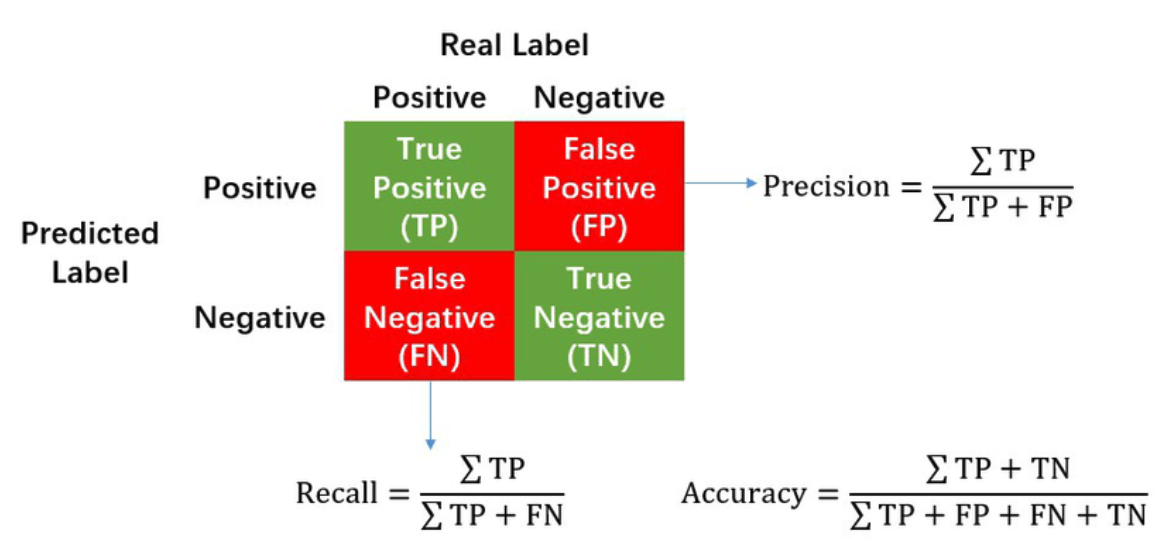

* Accuracy: (True positives + True negatives) / All
* Precision: True positives / (True positives + False positives)
* Recall: True Positives / (True Positives + False Negatives)
* F-1: Precision * Recall / (Precision + Recall)
  * [Harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def report_results(A, B):

    df = pd.DataFrame({'A':A,
                       'B':B})
    df = df.dropna()
    A = df['A'] # true labels
    B = df['B'] # predictions

    acc = accuracy_score(B, A)
    f1 = f1_score(B, A)
    prec = precision_score(B, A)
    rec = recall_score(B, A)

    performance = [acc, prec, rec, f1]

    return performance

#### **Logistic Regression + Count Vector**



In [141]:
### generate count vectors

count = CountVectorizer()

train_val_y = df['Medical']

train_val_X = count.fit_transform(df['News Title'])
train_val_X

### generate a KFold object

kf = KFold(n_splits = 5, # the number of folds
           shuffle = True, # randomly shuffle data
           random_state= 7)

for train_index, val_index in kf.split(train_val_X):

  print(len(train_index))
  print(len(val_index))

52428
13107
52428
13107
52428
13107
52428
13107
52428
13107


In [142]:
### cross validate

cv_acc = []
cv_pre= []
cv_rec = []
cv_f1 = []

for train_index, val_index in kf.split(train_val_X):

  train_X = train_val_X[train_index,:]
  val_X = train_val_X[val_index,:]

  train_y = train_val_y[train_index]
  val_y = train_val_y[val_index]

  lr = LogisticRegression()
  lr.fit(train_X, train_y)
  pred_y = lr.predict(val_X)

  lr_performance = report_results(pred_y, val_y)
  cv_acc.append(lr_performance[0])
  cv_pre.append(lr_performance[1])
  cv_rec.append(lr_performance[2])
  cv_f1.append(lr_performance[3])

print('\nLR + count')
print('- acc:', round(np.mean(cv_acc) * 100, 2))
print('- pre:', round(np.mean(cv_pre) * 100, 2))
print('- rec:', round(np.mean(cv_rec) * 100, 2))
print('- f1:', round(np.mean(cv_f1) * 100, 2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


LR + count
- acc: 97.52
- pre: 95.73
- rec: 80.65
- f1: 87.55


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Logistic Regression + TF-IDF Vector**



In [143]:
### generate TF-IDF vectors

tfidf = TfidfVectorizer()
train_val_X = tfidf.fit_transform(df['News Title'])
train_val_y = df['Medical']

### cross validate

cv_acc = []
cv_pre= []
cv_rec = []
cv_f1 = []

for train_index, val_index in kf.split(train_val_X):

  train_X = train_val_X[train_index,:]
  val_X = train_val_X[val_index,:]

  train_y = train_val_y[train_index]
  val_y = train_val_y[val_index]

  lr = LogisticRegression()
  lr.fit(train_X, train_y)
  pred_y = lr.predict(val_X)

  lr_performance = report_results(pred_y, val_y)
  cv_acc.append(lr_performance[0])
  cv_pre.append(lr_performance[1])
  cv_rec.append(lr_performance[2])
  cv_f1.append(lr_performance[3])

print('\nLR + tfidf')
print('- acc:', round(np.mean(cv_acc)*100,2))
print('- pre:', round(np.mean(cv_pre)*100,2))
print('- rec:', round(np.mean(cv_rec)*100,2))
print('- f1:', round(np.mean(cv_f1)*100,2))


LR + tfidf
- acc: 95.91
- pre: 96.92
- rec: 64.29
- f1: 77.3


#### **Logistic Regression + Word Embeddings**



In [144]:
### import libraries

from tqdm import tqdm
import nltk
from nltk import word_tokenize
from nltk import punkt
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

### read pre-trained embeddings

from google.colab import drive
drive.mount('/content/drive')

### generate embeddings for documents

embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.100d.txt', encoding = "utf8")  # this is where glove embedding file is stored
for line in tqdm(f):
    values = line.split()
    word = values[0]
    try:
       coefs = np.asarray(values[1:], dtype = 'float32')
       embeddings_index[word] = coefs
    except ValueError:
       pass
f.close()


def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(100) # dimension of embeddings being used
    return v / np.sqrt((v ** 2).sum())

glove_X = [sent2vec(x) for x in tqdm(df["News Title"])]
glove_X = np.array(glove_X)
y = df['Medical']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


400000it [00:09, 41588.65it/s]
100%|██████████| 65535/65535 [00:17<00:00, 3816.06it/s]


In [145]:
### cross validate

kf = KFold(n_splits = 5,
           shuffle = True,
           random_state = 7)

cv_acc = []
cv_pre= []
cv_rec = []
cv_f1 = []

for train_index, val_index in kf.split(train_val_X):
  train_X = glove_X[train_index,:]
  val_X = glove_X[val_index,:]

  train_y = y[train_index]
  val_y = y[val_index]

  lr = LogisticRegression()
  lr.fit(train_X, train_y)
  pred_y = lr.predict(val_X)

  lr_performance = report_results(pred_y, val_y)
  cv_acc.append(lr_performance[0])
  cv_pre.append(lr_performance[1])
  cv_rec.append(lr_performance[2])
  cv_f1.append(lr_performance[3])

print('\nLR + glove_100d')
print('- acc:', round(np.mean(cv_acc) * 100, 2))
print('- pre:', round(np.mean(cv_pre) * 100, 2))
print('- rec:', round(np.mean(cv_rec) * 100, 2))
print('- f1:', round(np.mean(cv_f1) * 100, 2))


LR + glove_100d
- acc: 95.68
- pre: 87.2
- rec: 70.47
- f1: 77.95
